# **Data Preprocessing**

In [20]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.simplefilter(action = "ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [58]:
df = pd.read_csv("/content/Project/diabetes_prediction_dataset.csv")

In [59]:
# Data Exploration
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,44.0,0,0,never,23.51,5.7,155,1
1,Female,44.0,0,0,never,37.20,5.7,145,0
2,Male,80.0,1,0,former,27.32,4.0,100,0
3,Male,64.0,0,0,former,26.97,5.7,200,1
4,Male,19.0,0,0,never,37.54,4.5,160,0


In [60]:
# Encode categorical variables
print(df.gender.unique())
print(df.smoking_history.unique())

['Female' 'Male' 'Other']
['never' 'former' 'current' 'ever' 'No Info' 'not current']


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183000 entries, 0 to 182999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               183000 non-null  object 
 1   age                  183000 non-null  float64
 2   hypertension         183000 non-null  int64  
 3   heart_disease        183000 non-null  int64  
 4   smoking_history      183000 non-null  object 
 5   bmi                  183000 non-null  float64
 6   HbA1c_level          183000 non-null  float64
 7   blood_glucose_level  183000 non-null  int64  
 8   diabetes             183000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 12.6+ MB


In [62]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Save preprocessed data for model building
df.to_csv('/content/Project/preprocessed_diabetes_data.csv', index=False)

print("Data preprocessing completed and saved as 'preprocessed_diabetes_data.csv'")

Data preprocessing completed and saved as 'preprocessed_diabetes_data.csv'


In [63]:
df = pd.read_csv('/content/Project/preprocessed_diabetes_data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,44.0,0,0,4,23.51,5.7,155,1
1,0,44.0,0,0,4,37.20,5.7,145,0
2,1,80.0,1,0,3,27.32,4.0,100,0
3,1,64.0,0,0,3,26.97,5.7,200,1
4,1,19.0,0,0,4,37.54,4.5,160,0


In [64]:
df.isna().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [65]:
df.duplicated().sum()


86854

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

<Axes: xlabel='diabetes', ylabel='Density'>

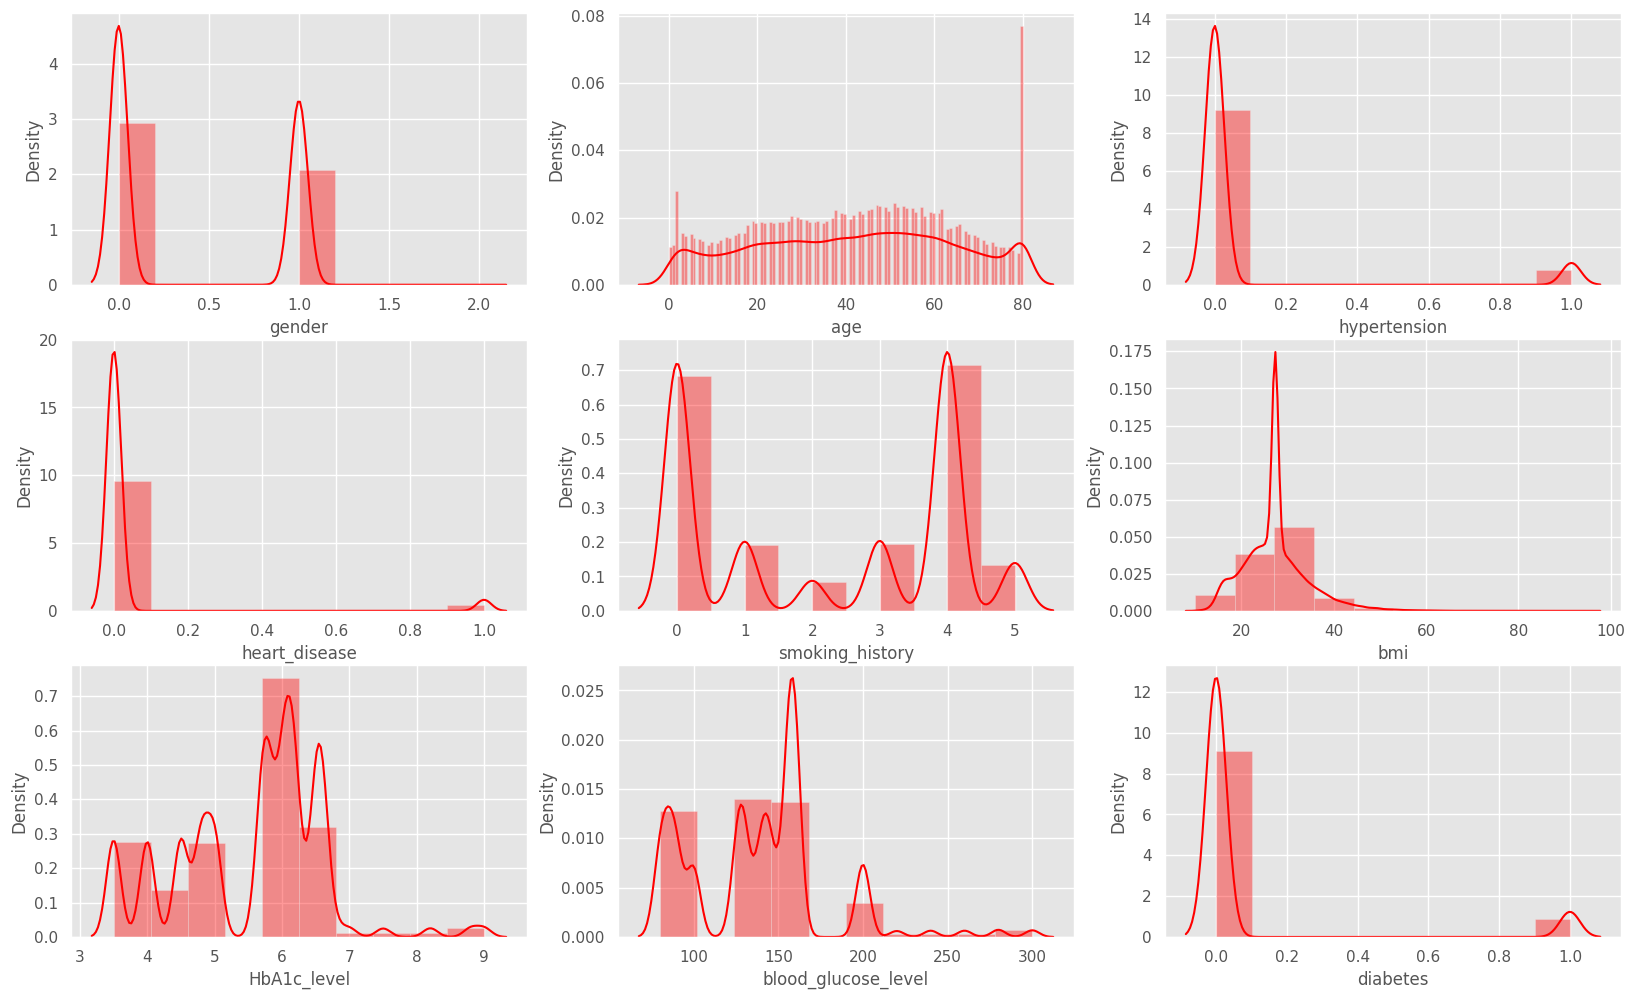

In [74]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(3,3, figsize=(20,12))
sns.distplot(df.gender, bins = 10, ax=ax[0,0], color="red")
sns.distplot(df.age, bins = 120, ax=ax[0,1], color="red")
sns.distplot(df.hypertension, bins = 10, ax=ax[0,2], color="red")
sns.distplot(df.heart_disease, bins = 10, ax=ax[1,0], color="red")
sns.distplot(df.smoking_history, bins = 10, ax=ax[1,1], color="red")
sns.distplot(df.bmi, bins = 10, ax=ax[1,2], color="red")
sns.distplot(df.HbA1c_level, bins = 10, ax=ax[2,0], color="red")
sns.distplot(df.blood_glucose_level, bins = 10, ax=ax[2,1], color="red")
sns.distplot(df.diabetes, bins = 10, ax=ax[2,2], color="red")

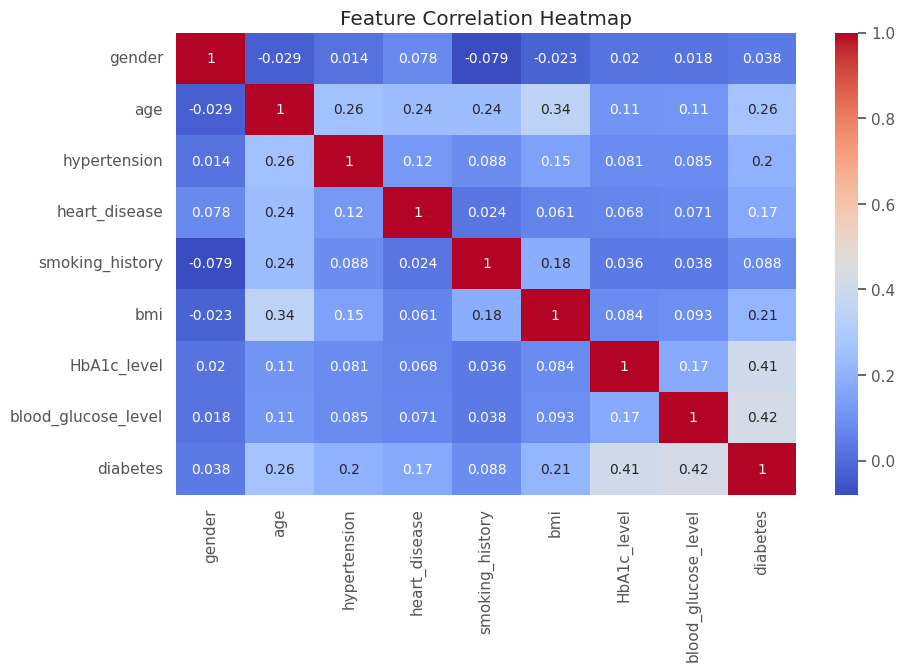

In [75]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


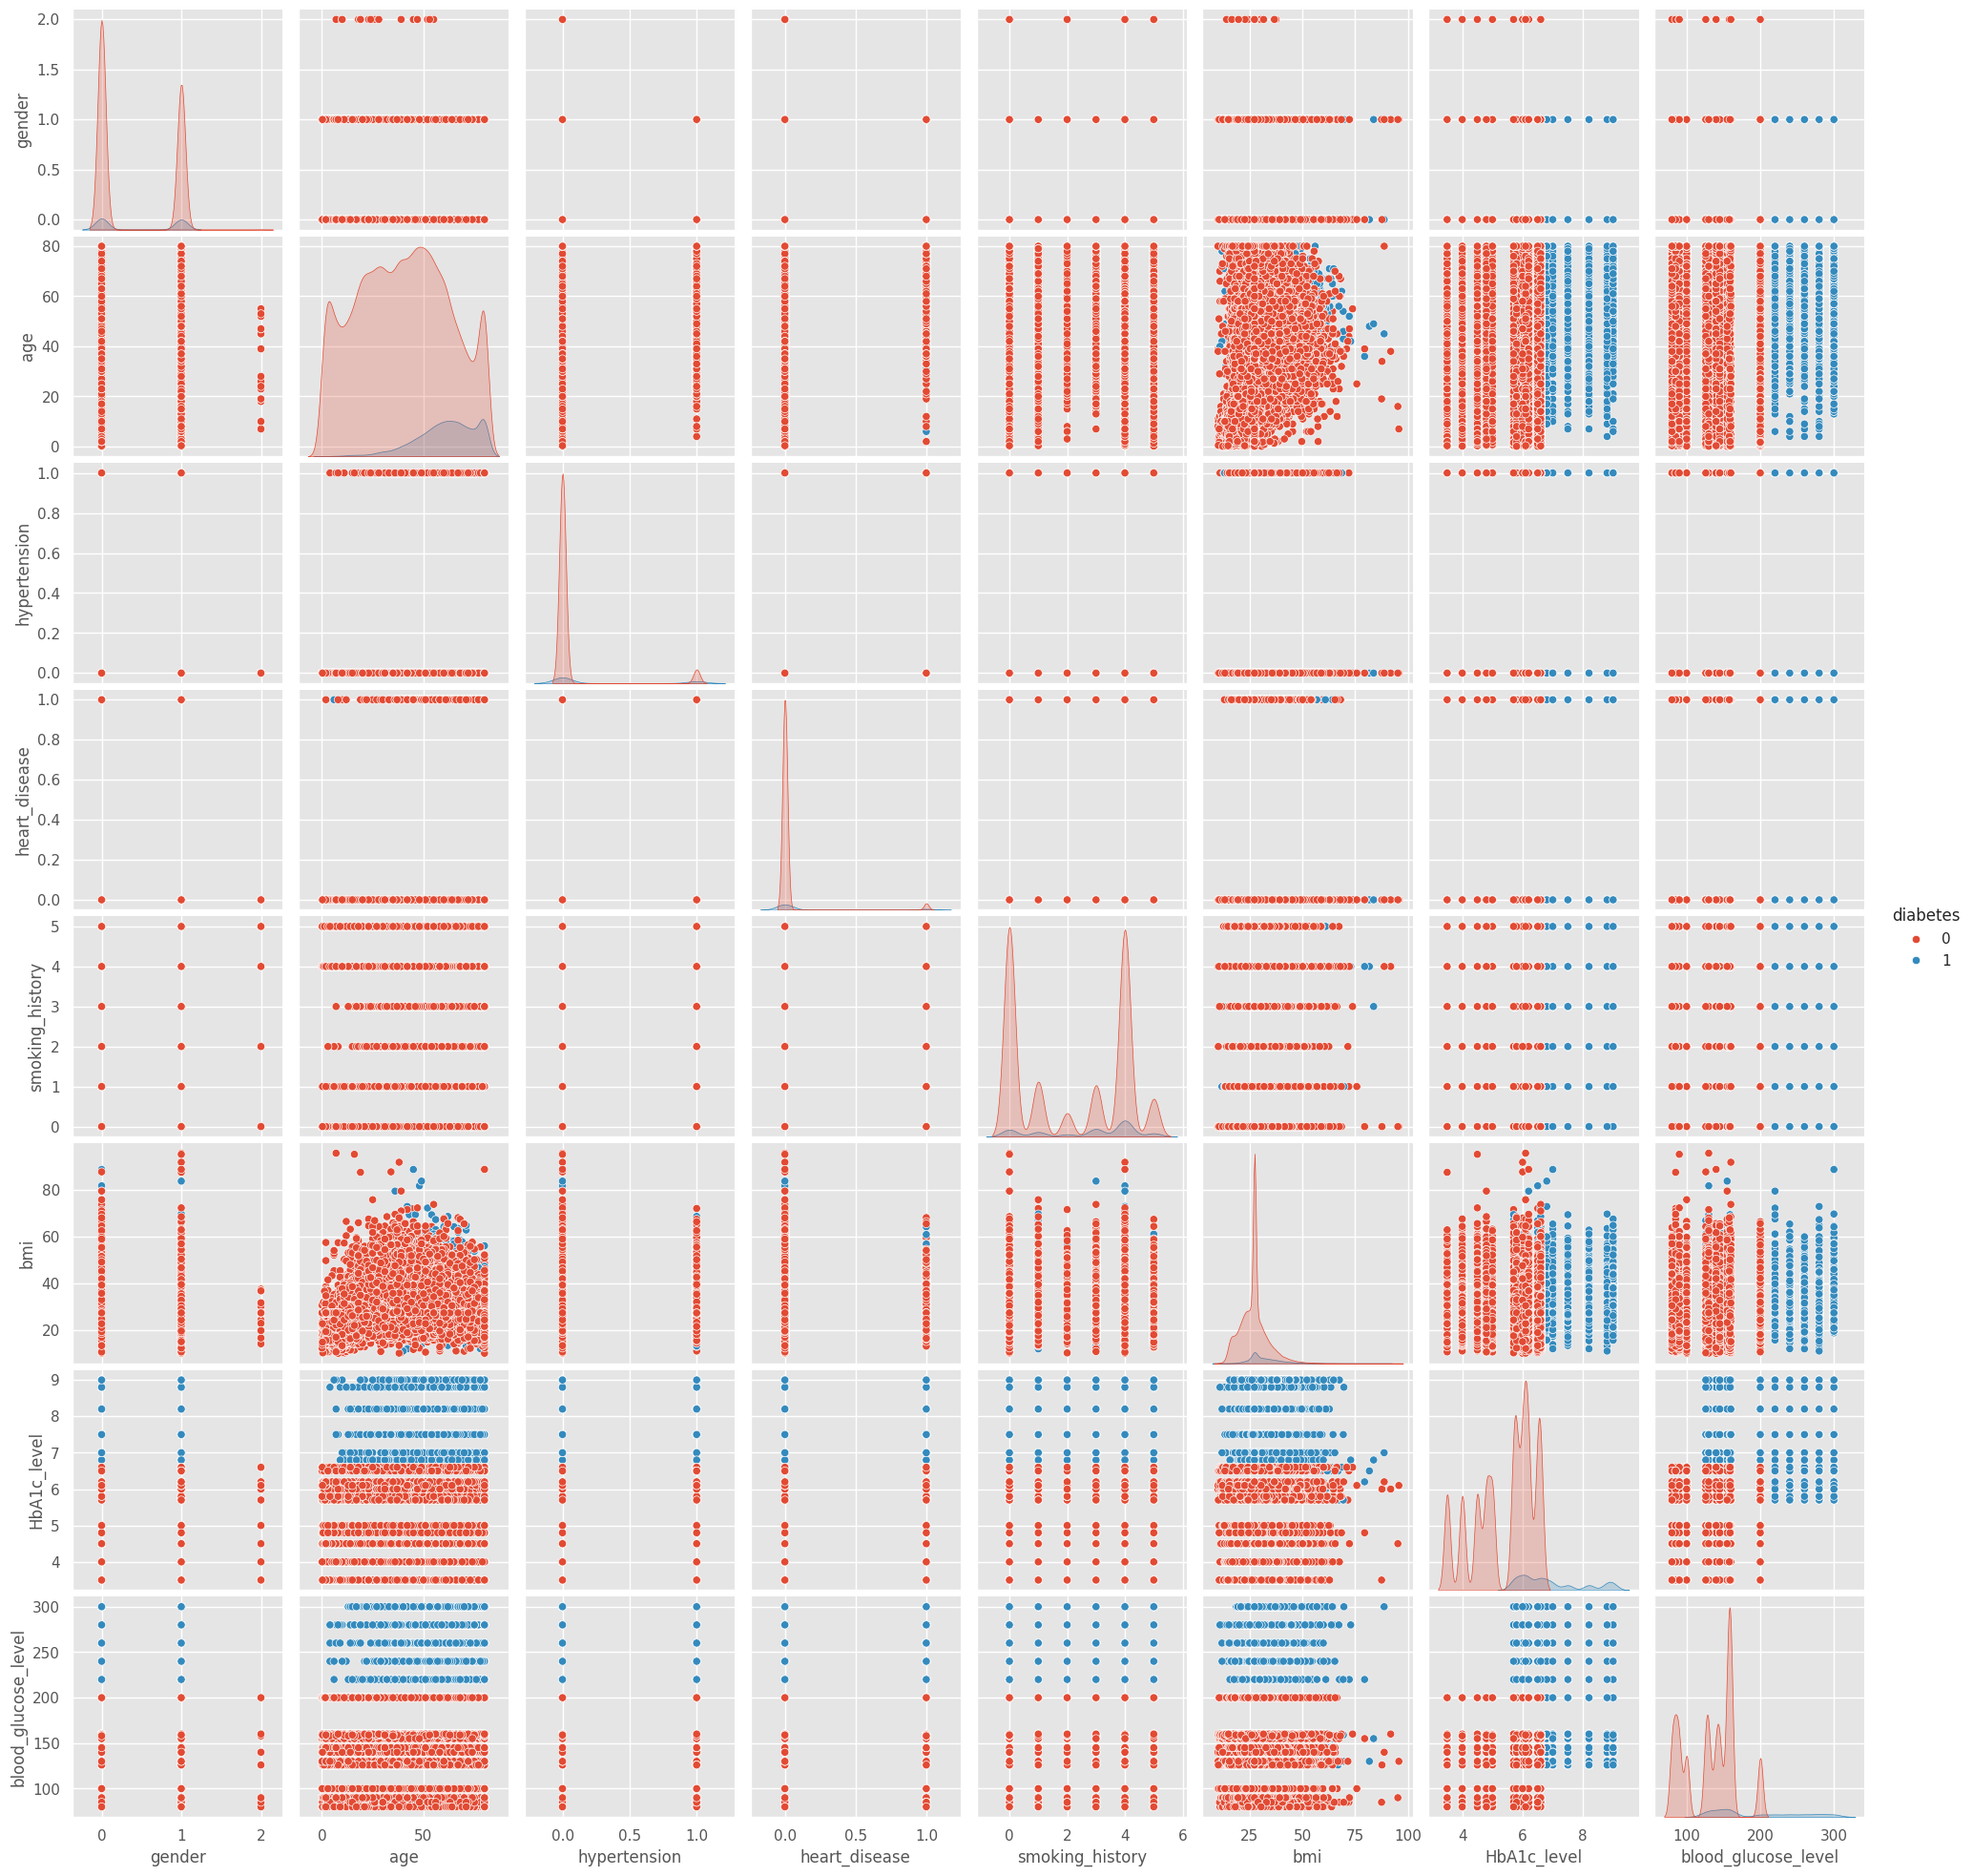

In [76]:
p=sns.pairplot(df, hue = 'diabetes')


# **Data Splitting**

In [69]:
# Load the dataset
data = pd.read_csv('/content/Project/preprocessed_diabetes_data.csv')

Features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Target = 'diabetes'

# Separate features and target variable
X = data[Features]
y = data[Target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (146400, 8), Test set shape: (36600, 8)


In [70]:
print(f"Original training set size: {y_train.value_counts()}")

Original training set size: diabetes
0    73200
1    73200
Name: count, dtype: int64


# **Model Selection**

**Random Forest**




In [71]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.9921857923497268
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     18300
           1       0.98      1.00      0.99     18300

    accuracy                           0.99     36600
   macro avg       0.99      0.99      0.99     36600
weighted avg       0.99      0.99      0.99     36600

Confusion Matrix:
 [[18018   282]
 [    4 18296]]


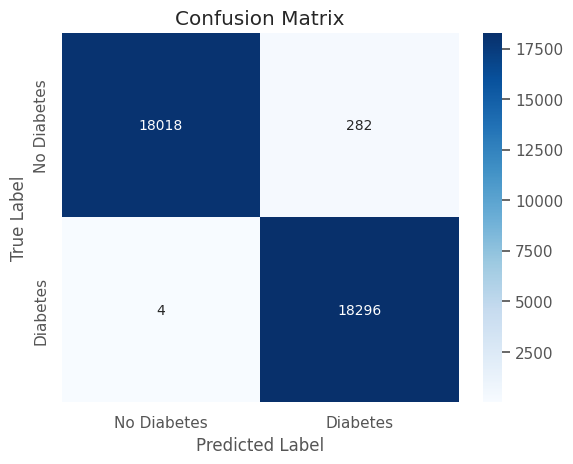

In [72]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Print evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Model Deployment**

In [79]:
import pickle

# Save the best model as a .pkl file
model_path = '/content/Project/Diabetes_Prediction_Model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print(f" model saved as '{model_path}'")

 model saved as '/content/Project/Diabetes_Prediction_Model.pkl'
